In [13]:
# Model design
import agentpy as ap
from random import choice

# Visualization
import matplotlib.pyplot as plt
import IPython

import RoadAgent
from City import City, Road
from City import Direction
import CarAgent

In [14]:
class CityModel(ap.Model):
    @staticmethod
    def __get_positions(grid: list[list]) -> list[tuple[int, int]]:
        positions = []
        for i, column in enumerate(grid):
            for j, space in enumerate(column):
                if type(space) is Road:
                    positions.append((i, j))
        return positions

    def setup(self):
        # Unpack parameters
        self.city: City = self.p["city"]
        self.n_cars: int = self.p["cars"]
        self.spawn_points: list[tuple[int]] = self.p["spawn_points"]
        self.size: tuple[int] = self.p["size"]

        # Create grid (city)
        self.grid = ap.Grid(self, size, track_empty=True)

        # Create agents
        roads = ap.AgentList(self, city.amount_of_roads, RoadAgent)
        road_positions = self.__get_positions(self.city.grid)
        self.grid.add_agents(roads, road_positions)
        for road in self.grid.agents:
            position = self.grid.positions[road]
            x, y = position
            road.add_directions(self.city.grid[x][y].directions)

        cars = ap.AgentList(self, self.n_cars, CarAgent)
        self.grid.add_agents(cars, positions=[choice(self.spawn_points) for _ in range(self.n_cars)])

    def step(self):
        for agent in self.agents:
            if agent.type is CarAgent:
                agent.move()

    def update(self):
        pass

    def end(self):
        pass

## Single Run Animation

In [15]:
# Define parameters

# time in s

size = (10, 10)
city = City(size[0], size[1])
city.add_street((4, 4), (4, 10), Direction.RIGHT)
city.add_street((0, 4), (10, 4), Direction.UP)

parameters = {
    "size": size,
    "city": city,
    "cars": 10,
    "spawn_points": [(0, 4), (4, 0)],
    "steps": 20
}

TypeError: 'module' object is not callable

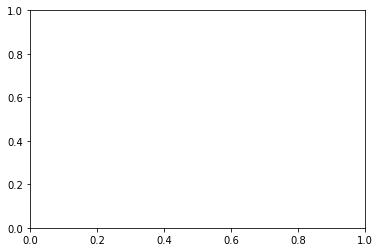

In [16]:
# Create single-run animation with custom colors


def map_agent_to_number(agents: ap.AgentIter):
    agent: ap.Agent
    road_exists = False
    for agent in agents:
        if agent.type is CarAgent:
            return 1
        if agent.type is RoadAgent:
            road_exists = True
    if road_exists:  # There is road and no cars
        return 0
    return None  # There are no agents in that position


def animation_plot(model, ax):
    attr_grid = model.city.apply(map_agent_to_number)
    color_dict = {0: '#7777', 1: '#d62c2c', 2: '#e5e5e5', None: '#d5e5d5'}
    ap.gridplot(attr_grid, color_dict, True, ax)
    ax.set_title(f"Simulation of a city\n"
                 f"Time-step: {model.t}")


fig, ax = plt.subplots()
city_model = CityModel(parameters)
animation = ap.animate(city_model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml(fps=15))